<a href="https://colab.research.google.com/github/gabrielborja/machine_learning/blob/main/decision_trees_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Decision Trees for Classification

## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf

## 01 Data Preprocessing Classification

In [ ]:
# Loading first dataset from local drive
from google.colab import files
uploaded_1 = files.upload()

In [ ]:
# Loading second dataset from local drive
from google.colab import files
uploaded_2 = files.upload()

In [ ]:
# Storing dataset 1 to a pandas dataframe
import io
df1 = pd.read_excel(io.BytesIO(uploaded_1['0731_chu.xlsx']), sheet_name='Sheet1')

In [ ]:
# Storing dataset 2 to a pandas dataframe
import io
df2 = pd.read_csv(io.BytesIO(uploaded_2['0731_sto.csv']), sep=',')

In [ ]:
# Modifying columns to lower case for both datasets
df1.rename(columns={i:i.lower() for i in df1.columns}, inplace=True)
df2.rename(columns={i:i.lower() for i in df2.columns}, inplace=True)

In [ ]:
# Dropping unneccesary columns from both datasets
df1.drop(columns=['company_churn'], axis=1, inplace=True)
df2.drop(columns=['company_churn'], axis=1, inplace=True)

In [ ]:
# Sampling dataset 2 to balance both classes
bl_size = int((df1.shape[0])*1.30)
#bl_size
df3 = df2.sample(n=bl_size, axis=0, replace=False, random_state=0)

In [ ]:
# Stacking both dataframes containg both classes
df_cl = pd.concat([df1, df3], ignore_index=True)

In [ ]:
# Checking the dataframe
df_cl.tail()

In [ ]:
# Dropping dependent / unnecesary variables
df_cl.drop(columns=[i for i in df_cl.columns if i[:3] == 'out'], inplace=True)

In [ ]:
# Checking the dataframe info
df_cl.info()

In [ ]:
# Creating the matrix of features and the dependent variable vector
X = df_cl.iloc[:,:-1].values
y = df_cl.iloc[:,-1:].values
print(f'[X: {X.shape}], [y:{y.shape}]')

In [ ]:
# Splitting the data into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0, shuffle=True)

## 02 Building the Decision Tree for Classification

In [ ]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_cs = DecisionTreeClassifier(criterion='entropy', max_depth=9, max_leaf_nodes=4, random_state=0) #
tree_cs.fit(X_train, y_train)

In [ ]:
# Evaluating accuracy of the DT Classifier
print(f'Accuracy on training set: {tree_cs.score(X_train, y_train)}')
print(f'Accuracy on test set    : {tree_cs.score(X_test, y_test)}')

In [ ]:
# Checking the DT Classifier classes
tree_cs.classes_

In [ ]:
# Importing Export graph packages
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

In [ ]:
# Visualizing the DT Classifier
export_graphviz(tree_cs, out_file='tree_cs.dot', class_names=['No Churn','Churn'], feature_names=df_cl.columns[:-1], impurity=False, filled=True)
with open('tree_cs.dot') as f:
  dot_graph = f.read()
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
#pydot_graph.set_size('"5.5!"')
pydot_graph.write_png('resized_tree.png')
display(graphviz.Source(dot_graph))

In [154]:
# Creating a function to plot the feature importance of DT Classifier
def plot_feature_importances_tree_class(df, model):
  n_features = df.shape[1] - 1
  #return n_features
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), df.columns[:-1])
  plt.xlabel("DT Classifier - Feature importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
  plt.show()

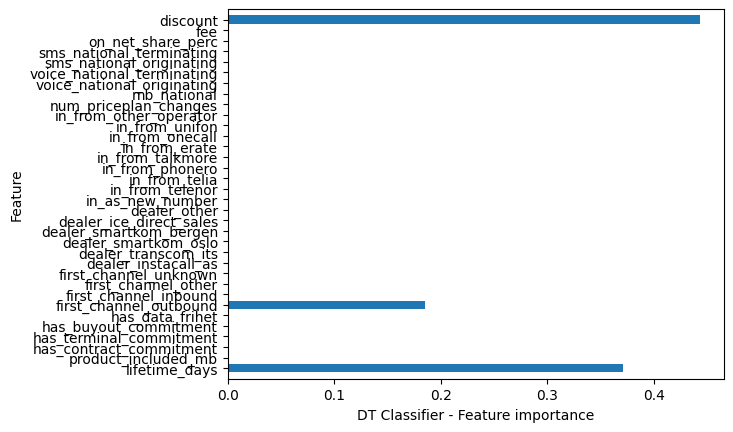

In [155]:
# Visualizing the feature importance of DT Classifier
plot_feature_importances_tree_class(df=df_cl, model=tree_cs)